In [20]:
import PIL
from PIL import Image
import imagehash

import pycamhd.pycamhd as camhd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xar
import urllib as url

movLink = "https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2017/03/12/CAMHDA301-20170312T181500.mov"
movAtom = camhd.get_moov_atom(movLink)
frameTotal = camhd.get_frame_count(movLink, movAtom) 
frames = range(0,frameTotal,200)
#print(frameTotal)                        26983

def diff_letters(a,b):
    if (len(a) != len(b)):
        return -1
    else:
        return sum ( a[i] != b[i] for i in range(len(a)) )

In [27]:
avgFrameHashes = []
avgFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.average_hash(im)
    print(hash)
    avgFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    avgFrameIntHashes.append(intHash)

0000000000000000
0
0000000000000000
0
0000000000000000
0
07070f0e0e2b61e1
1393
07070f0e0e2a61c1
1261
07070f0e1f2a61c1
1397
06064f6f47070305
1482
0707cf4fc7070303
1768
07070f0e1e2f61e0
1305
040c6eee4f0f0f06
1135
04042eee0f0f0707
1227
00042eee4f0f0707
1197
04042eee0f0f0707
1227
04042eee4f0f0707
1229
080e1f1f1f1f0f0f
1600
0000000707070f0f
1152
0000020707070707
1184
060f7f7f3f1f0702
1632
0e0f7f7f3f070702
1624
067f7f7f7f1f0706
1680
064f7f7f7f3f0707
1800
0001070707070f0f
1504
0000000707070f0f
1152
0000000707070f0f
1152
00243c7e3e6e3e47
814
040c6eef4f070706
1231
00206c7e3e6e6f07
896
00003e3e3e7e7e7e
750
00003e3e3e7e7e7e
750
40626f6767630306
1264
c2c7dfcea6820300
1018
373f3f2f2f2e6c08
1414
373f3d6f6f6e2c08
1354
373f3d2f6f2e2c08
1350
373f3f2f6f2e6c08
1416
373f2d2f6f6e2c08
1344
373f3d2f2f2e2c08
1348
b73f2f2f2f2f2808
1501
00213f3f7767cede
1342
00003e3e3e7e7e7e
750
00347c7c7e7e7e7c
608
04042eee0f0f0f07
1243
040c2eee0f0f0f07
1259
80e0fcfcfcfcfcdc
382
00003c7c7cfcfcfc
373
00003c7c7cfcfcfc
373
814147

In [28]:
pFrameHashes = []
pFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.phash(im)
    print(hash)
    pFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    pFrameIntHashes.append(intHash)

0000000000000000
0
0000000000000000
0
0000000000000000
0
b3b4690f5a586da4
975
b1b5694b5a586da4
1009
b3b5694b5a5865a4
1057
b2155f2e52aba568
1085
b1b00e0e55a3b5bd
1107
b337682a5e456956
1087
945249ad74ba5f25
995
905249a736bb5d2d
1153
905249a736bb5d2d
1153
905249a736bb5d2d
1153
905249a736bb5d2d
1153
985569a24ead67aa
1024
b6495bb4a44b4b96
1080
a55b5aada45251ad
1084
80f3157e1579153d
1184
80f3156e4178736f
1106
80f315565178537f
1106
80f21556517a537f
1042
aa55552aaa555755
1168
b6494bb4a54b4b96
1200
b6494bb4a54b4b96
1200
974b29166c4b3c3e
1143
945249ad74ba5f25
995
904b69103ee36bb7
1151
962e69339ec159b4
1026
962e69739ec159a4
1020
a142543e5e3a2a7f
917
b5f0616752694cae
943
83ae4ab437712d53
1197
83ae4ea431716f5a
1079
83ae5ca433457d5a
1051
83ae5cb471416f5a
1021
83ae4fa43871675a
1079
83ae5ca561717d52
1073
83be58a075536b5a
1029
830b7b346c5555d6
1168
962e69739ec159a4
1020
d20e2f2d3cc17ba4
1061
905249af3cbb5d25
1105
905249af3cbb5d25
1105
d26f354b78f0290e
1008
d2276c7892c36f32
977
d2276c7892c36f16
1005
a36

In [29]:
dFrameHashes = []
dFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.dhash(im)
    print(hash)
    dFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    dFrameIntHashes.append(intHash)

0000000000000000
0
0000000000000000
0
0000000000000000
0
9f0e5e3c6c5ac397
1115
9f0e5e3c2c5ac783
1105
9e0e5e3c6c5ac783
979
fedededf9def3f29
1456
af3f9e9aaa8f4b7a
1337
9d0e5e3c6cdbc397
1180
9cc8cc8c8c5c9e9c
461
988ccc8c8c5c9e9e
523
988ccc8c8c5c9e9e
523
9888cc8c8c1c9ebe
493
988cdc8c8c5c9ebe
535
f8f8f8f4fdfdfdf5
888
d8c86decf45cfcbd
640
98c8de6ee6d6defe
745
9c8c9eceececf6fe
690
9cde9edeceeceefe
840
9c9c9e8eccecf6fe
692
9cdc9a9cccecf6f6
590
cededfefefffbfbf
1744
d8c8e9ececdcfdfd
748
d8d87decfcdcfdfd
803
dcc8c8ccecdccc9e
434
9cc88c8c8c5c9e9c
459
d8c8c8ccecdccc9e
402
f0e4ecececdcd890
314
d0e4ecececdcd890
310
8ccecacfc6c6aece
920
968ebaac6c6a434f
940
6d6559cededad8d9
1013
6d6549dcdcdad8d9
885
6d6d4dcdd9d8d8d9
1085
6d6d4dcdd8d8d8d9
957
6c6d4ddcdddcd8d9
901
6c6d4dccc9d8d8d9
821
6e6d494ecadad9db
1108
cbc9cdcfcc8e0c34
1036
f0e4ecececdcd890
314
e4ecc8c8acd8d8c8
258
988cdc8c8c5c9e9e
531
98c8dc8c8c5c9e9e
501
184808b8b8589898
192
c0c0c8c9e9d89890
384
d0c0c8c9e9d890b0
380
038bcecdcfbfbc28
1272
968eafad

In [4]:
wFrameHashes = []
wFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.whash(im)
    print(hash)
    wFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    wFrameIntHashes.append(intHash)

0000000000000000
0
0000000000000000
0
0000000000000000
0
07070f0e1f6bf1e1
1540
07070f1e1f6af1e1
1420
07070f1e1f6bf1c1
1544
060e4fef6707070f
1615
070fefcfc7070303
1789
07070f1e1f2f71e1
1577
040c6eef4fcf0f06
1266
040c6eef4f4f0f07
1393
040c6eef4f4f0f07
1393
040c6eef4f4f0f07
1393
040c6eef4f4f0f07
1393
000e1f1f1f1f1f0f
1592
00002f3f3f3f1f0f
1488
00002f3f3f1f1f1f
1492
06075f7f3f170702
1596
060f7f7f3f070302
1576
060f7f7f3f070302
1576
060f4f7f3f0f0702
1612
00070f3f1f1f0f1f
1700
00002f3f3f3f1f0f
1488
00060f3f3f1f1f0f
1576
00243c7e3e7e3e47
822
042c6eef4f8f0f06
1268
00206e7e7e6e6f07
962
00003e3e3e7e7e7c
686
00003e3e3e7e7e7c
686
40626f6fe7670326
1317
e2c7dfcfaea20300
1170
253d2f2f2f2e4c0c
1298
253d3d2f2f6e0c0c
1242
273f3d2f2d6c0c0c
1242
353f2d2f2d6e0c0c
1242
373f2d2f2f6e0808
1306
373f2d2f2d2e0c0c
1304
b6bf2d2f2f2f0800
1290
00213f3f7747c6c6
1298
00003e3e3e7e7e7c
686
00243c7c7e7c7e6c
526
040c6eef4f4f0f07
1393
040c6eef4f8f0f07
1392
00a0e8fc7cfc7c5c
336
00003c7c7cfcfcfc
373
00003c7c7cfcfcfc
373
81c16f

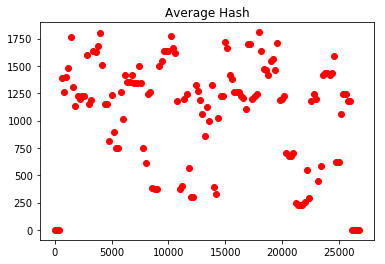

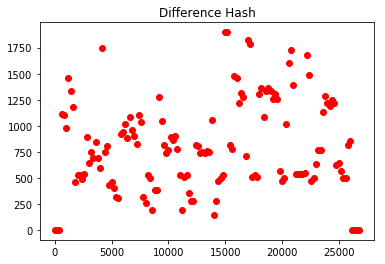

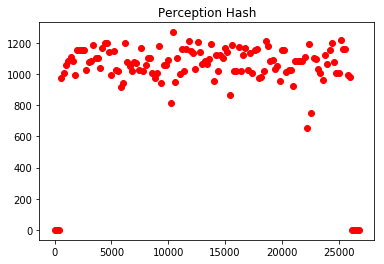

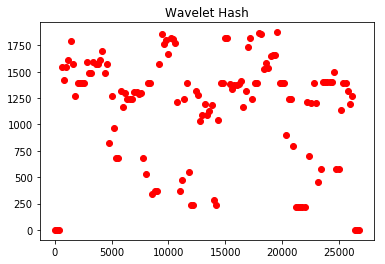

In [17]:
plt.plot(frames,avgFrameIntHashes,"ro")
plt.title("Average Hash")
plt.show()

plt.plot(frames,dFrameIntHashes,"ro")
plt.title("Difference Hash")
plt.show()

plt.plot(frames,pFrameIntHashes,"ro")
plt.title("Perception Hash")
plt.show()

plt.plot(frames,wFrameIntHashes,"ro")
plt.title("Wavelet Hash")
plt.show()

In [31]:
wStrHashBin = []
wStrHashBinDiff = []

for i in wFrameHashes:
    wStrHashBin.append(((bin(int(str(i), 16))))[2:].zfill(64))

index = 0
while index < len(wFrameHashes) - 1:
    diffCount = diff_letters(wStrHashBin[index], wStrHashBin[index + 1])
    wStrHashBinDiff.append(diffCount)
    index += 1
#
pStrHashBin = []
pStrHashBinDiff = []

for i in pFrameHashes:
    pStrHashBin.append(((bin(int(str(i), 16))))[2:].zfill(64))

index = 0
while index < len(pFrameHashes) - 1:
    diffCount = diff_letters(pStrHashBin[index], pStrHashBin[index + 1])
    pStrHashBinDiff.append(diffCount)
    index += 1
#
dStrHashBin = []
dStrHashBinDiff = []

for i in dFrameHashes:
    dStrHashBin.append(((bin(int(str(i), 16))))[2:].zfill(64))

index = 0
while index < len(dFrameHashes) - 1:
    diffCount = diff_letters(dStrHashBin[index], dStrHashBin[index + 1])
    dStrHashBinDiff.append(diffCount)
    index += 1

#
avgStrHashBin = []
avgStrHashBinDiff = []

for i in avgFrameHashes:
    avgStrHashBin.append(((bin(int(str(i), 16))))[2:].zfill(64))

index = 0
while index < len(avgFrameHashes) - 1:
    diffCount = diff_letters(avgStrHashBin[index], avgStrHashBin[index + 1])
    avgStrHashBinDiff.append(diffCount)
    index += 1

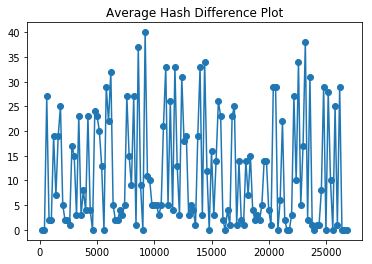

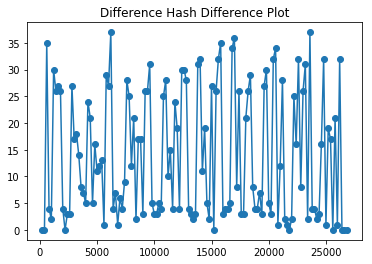

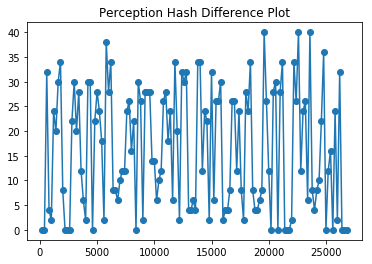

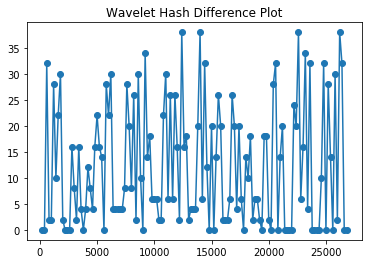

In [32]:
plt.plot(frames[1:], avgStrHashBinDiff, "-o")
plt.title("Average Hash Difference Plot")
plt.show()

plt.plot(frames[1:], dStrHashBinDiff, "-o")
plt.title("Difference Hash Difference Plot")
plt.show()

plt.plot(frames[1:], pStrHashBinDiff, "-o")
plt.title("Perception Hash Difference Plot")
plt.show()

plt.plot(frames[1:], wStrHashBinDiff, "-o")
plt.title("Wavelet Hash Difference Plot")
plt.show()